In [2]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [4]:
print(df.shape)

(421, 6)


In [5]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [6]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [7]:
dfx.describe()

,Open,High,Low,Volume
count,421.000000,421.000000,421.000000,421.000000
mean,0.372409,0.374434,0.373457,0.117439
std,0.175834,0.171931,0.171432,0.084973
min,0.000000,0.000000,0.000000,0.000000
25%,0.262729,0.267857,0.269618,0.064016
50%,0.350305,0.349206,0.352113,0.101418
75%,0.443992,0.452381,0.444668,0.146095
max,1.000000,1.000000,1.000000,1.000000


In [8]:
dfy.head()

,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [9]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [10]:
X[:5]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015]]

In [11]:
y[:5]

[[0.5791583166309452],
 [0.6072144288552817],
 [0.5390781563104646],
 [0.5671342685348011],
 [0.5551102204386569]]

In [12]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [13]:
# 10일간의 OHLVC 데이터
data_X[0]

[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015],
 [0.5519348268816622,
  0.5357142857121598,
  0.5251509054304823,
  0.17775773908379244],
 [0.5193482688369884,
  0.5079365079344923,
  0.4929577464768895,
  0.24207018961868487],
 [0.47861507128114616,
  0.49999999999801586,
  0.49496981891148906,
  0.19484190950809502],
 [0.5234215885925726,
  0.5119047619027305,
  0.5050301810844868,
  0.100853881024588],
 [0.5071283095702357,
  0.4880952380933012,
  0.5030181086498873,
  0.03892790771899896]]

In [14]:
# data_X[0]을 넣었을 때의 정답인 data_y[0]
data_y[0]

[0.503006012022032]

In [15]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 411 411


In [16]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

C:\Users\insun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0932
Epoch 2/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0652
Epoch 3/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0368
Epoch 4/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119
Epoch 5/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105
Epoch 6/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0080
Epoch 7/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0074
Epoch 8/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075
Epoch 9/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 10/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059
Epoch 11/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055
Epoch 12/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051
Epoch 13/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058
Epoch 14/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060
Epoch 15/70
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055
Epoch 16/70
10/10 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


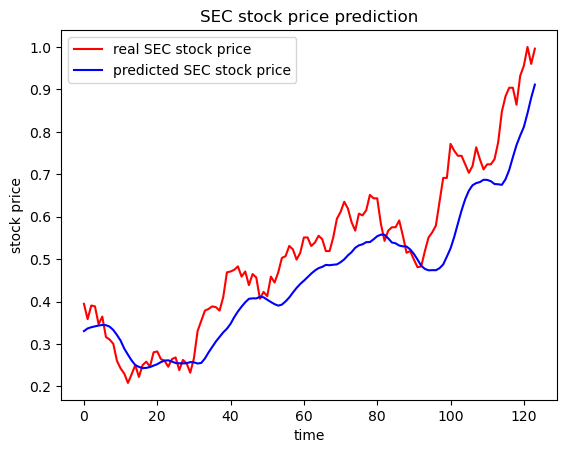

내일 SEC 주가 : [56992.13] KRW


C:\Users\insun\AppData\Local\Temp\ipykernel_12832\1566400120.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')


In [20]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')

## split.sequence으로 순환데이터 만들기¶


In [21]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 예제 사용법:
# 'data'는 순차적인 데이터로, 리스트나 numpy 배열 형태로 가정합니다.
data = df

# 원하는 시퀀스 길이를 지정합니다.
seq_length = 3

# 시퀀스 생성
sequences = create_sequences(data, seq_length)

print("원본 데이터:")
print(data)
print("\n길이가", seq_length, "인 시퀀스:")
print(sequences)

원본 데이터:
             Open   High    Low  Close    Volume    Change
Date                                                      
2018-05-04  53000  53900  51800  51900  39565391 -0.020755
2018-05-08  52600  53200  51900  52600  23104720  0.013487
2018-05-09  52600  52800  50900  50900  16128305 -0.032319
2018-05-10  51700  51700  50600  51600  13905263  0.013752
2018-05-11  52000  52200  51200  51300  10314997 -0.005814
...           ...    ...    ...    ...       ...       ...
2020-01-16  59100  60700  59000  60700  14381774  0.028814
2020-01-17  61900  62000  61000  61300  16025661  0.009885
2020-01-20  62000  62800  61700  62400  12528855  0.017945
2020-01-21  62000  62400  61200  61400  11142693 -0.016026
2020-01-22  60500  62600  60400  62300  15339565  0.014658

[421 rows x 6 columns]

길이가 3 인 시퀀스:
[[[ 5.30000000e+04  5.39000000e+04  5.18000000e+04  5.19000000e+04
    3.95653910e+07 -2.07547170e-02]
  [ 5.26000000e+04  5.32000000e+04  5.19000000e+04  5.26000000e+04
    2.31047200e+0